# COVID-19 Global Forecasting 

#### Burak Emre Özer - 21527266
#### Didem Yanıktepe - 21527563 

<img src="images/cover.png">

## Soyutlama

Hızla artan insan popülasyonu ile birlikte bu nüfusun doğal yaşama müdahelesi dünya genelinde pandemi vakalarına sebep olmaktadır. Bu pandemilerin ekonomi, politika ve en önemlisi insan sağlığı üzerinde önemli etkileri olmaktadır. İleride bu salgınların daha sık tekrarlanabileceği göz önüne alındığında bu durum karşısında hazırlıklı olmak gerekiyor. Bu projede, zaman serisi verileri kullanarak tahminleme yöntemleri hakkında bir inceleme yapacağız. Veri seti olarak salgının başlangıcından itibaren gün gün istatistiklerin bulunduğu bir veri seti kullanacağız. Veri analiz teknikleriyle harita görselleştirmeleri, veriyi anlamlandırmaya çalışacağız. Ardından istatistiksel yaklaşımlarla (SIR, ARIMA, SARIMAX) geleceğe yönelik tahminler yapacağız. Bu tahminler ülkeler bazında salgın boyunca izlenen yollar ve tedaviler hakkında çıkarımlar yapabilmemizi sağlayacaktır. Gelecekte ise salgın tahminleri modellerimizi daha kompleks (SEIR) hale getirmeyi düşünüyoruz. Böylece daha farklı senaryolar ortaya çıkarabiliriz. Böylece modellerin daha isabetli tahminler ve çıkarımlar sağlamasını sağlar.

## İçerik

* [1-Problem](#Problem)
* [2-Verinin Anlaşılması](#Verinin-Anlaşılması)
* [3-Verilerin hazırlanması](#Verilerin-hazırlanması)
* [4-Modelleme Ve Değerlendirme](#Modelleme-Ve-Değerlendirme)
    * [a. SIR Model](#SIR-Model)
    * [b. ARIMA & SARIMAX](#ARIMA-&-SARIMAX)
* [5-Sonuç](#Sonuç)
* [6-Referanslar](#Referanslar)

# Problem

Salgınlar dünyayı önemli ölçüde etkilemektedir. Bu salgının gidişatı hakkında varsayımlara sahip olmak salgınla mücadele yönetimini daha efektif ve çözüm odaklı kılabilir. Bu projede bizim amacımız, salgının seyrini yani vaka ve ölüm sayılarını tahmin edebilecek istatistiksel yöntemler kullanarak birbirinden farklı modeller geliştirmektir. Veri analizi tekniklerini ile pandemi hakkında çıkarımlar yapmak, COVID-19'un iletim hızını insanların izolasyon seviyesi ile incelemek ve istatistiksel yöntemler kullanarak doğru tahminler üretmek istiyoruz.
* "Salgının ana merkez bölgelerini belirleyebilir miyiz?"
* "Salgın hangi bölgelerden hangi bölgelere nasıl bir yayılım gerçekleştiriyor?",
* "Salgın sürecinde gelecek için başarılı tahminler yapan bir model oluşturabilir miyiz?", 
* "Farklı sosyal izolasyon değerlerinin pandemi üzerindeki etkisi nedir?"

Bu soruların cevapları, hükümetlerin bir salgına karşı nasıl harekete geçmeleri veya eylemlerin sonuçlarını nasıl izlemeleri gerektiği gibi faydalar sağlayabilir.

# Verinin Anlaşılması

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.dates import DateFormatter
import datetime
# !pip install folium
import folium as folium
# !pip install plotly
import plotly.express as px
import itertools
from math import sqrt
import matplotlib.dates as mdates
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

# !pip list
plt.style.use('bmh')
%matplotlib inline
plt.rcParams['figure.figsize'] = [9.5, 6]

## Verinin toplanması

Veriyi, Kaggle ve referanslarda belirtilen üniversiteler üzerinden csv biçiminde elde ettik. Veri genel anlamda vaka sayısı, ölüm ve iyileşme istatistiklerini içeren zaman serisi formunda bir dosyadır. 

[**COVID-19 Dataset** (Confirmed, Death and Recovered cases every day across the globe)](https://www.kaggle.com/imdevskp/corona-virus-report)

Aynı zamanda ülkeler hakkında faydalı bilgiler içeren örneğin ortalama yaş, toplam popülasyon gibi bir veri setini daha içeri aktardık.

[**COVID-19 Useful features by country**](https://www.kaggle.com/c/covid19-global-forecasting-week-5/discussion/148263)

Oxford COVID-19 Tracker:

Amacı, hükümetin dünya çapındaki koronavirüs salgınına verdiği yanıtları titizlikle ve tutarlı bir şekilde izlemek ve karşılaştırmaktır. **Sıkılık Endeksi (SI)**. SI, 0'dan 100'e kadar bir değer üretmek için yedi farklı kilit göstergesine dayanan basit bir skordur: 0 kısıtlama olmadığı anlamına gelir, **100 tam Wuhan tarzı** kilitlenme anlamına gelir.

[**Coronavirus Government Response Tracker**](https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker)

In [2]:
clean_complete_df = pd.read_csv('./covid_19_clean_complete.csv', parse_dates=['Date'])
useful_features = pd.read_csv("./countries_useful_features.csv")
stringency_index = pd.read_csv("./covid-stringency-index.csv", parse_dates=['Date'])

## Veriyi açıklama

Temel olarak, verilerimize eklenmesi gereken zorunlu kısımları Tarih (datetime), Onaylanan vaka sayısı (int64), Ölüm sayısı (int64) ve Kurtarılan (int64), Ülke (nesne) olarak belirledik.

In [3]:
display(clean_complete_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30740 entries, 0 to 30739
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  9280 non-null   object        
 1   Country/Region  30740 non-null  object        
 2   Lat             30740 non-null  float64       
 3   Long            30740 non-null  float64       
 4   Date            30740 non-null  datetime64[ns]
 5   Confirmed       30740 non-null  int64         
 6   Deaths          30740 non-null  int64         
 7   Recovered       30740 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.9+ MB


None

In [4]:
display(stringency_index.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7876 entries, 0 to 7875
Data columns (total 4 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Entity                                                              7876 non-null   object        
 1   Code                                                                7876 non-null   object        
 2   Date                                                                7876 non-null   datetime64[ns]
 3   Government Response Stringency Index ((0 to 100, 100 = strictest))  7876 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 246.2+ KB


None

## Veriyi keşfetme

Veri kümesi, tüm ülkeler için her güne ait kümülatif istatistikler içerir. **Günlük** vaka istatistiklerini incelemek için, satırların farkını almamız ve gelecekte yeni bir veri çerçevesi oluşturmamız gerekebilir. Bunu her ülke için bir fonksiyon yaratabiliriz.

In [5]:
clean_complete_df.sort_values(by='Date').describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,30740.000000,30740.000000,3.074000e+04,30740.000000,30740.000000
mean,21.181891,22.881195,4.464725e+03,297.383604,1311.136207
std,24.904277,70.245571,4.057051e+04,2811.876832,9658.594359
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,6.877000,-15.310100,0.000000e+00,0.000000,0.000000
50%,23.634500,21.005900,1.800000e+01,0.000000,1.000000
75%,41.153300,78.000000,3.930000e+02,5.000000,90.000000
max,71.706900,178.065000,1.467820e+06,88754.000000,268376.000000


In [6]:
stringency_index.sort_values(by='Date').describe()

,"Government Response Stringency Index ((0 to 100, 100 = strictest))"
count,7876.000000
mean,21.739502
std,28.110250
min,0.000000
25%,0.000000
50%,9.520000
75%,33.330000
max,100.000000


In [7]:
display(clean_complete_df.head())
display(useful_features.head())
display(display(stringency_index.head()))

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


,Country_Region,Population_Size,Tourism,Date_FirstFatality,Date_FirstConfirmedCase,Latitude,Longtitude,Mean_Age,Lockdown_Date,Lockdown_Type,Country_Code
0,Afghanistan,37172386,14000,2020-03-23,2020-02-25,33.939110,67.709953,17.3,2020-03-24,Full,AFG
1,Albania,2866376,5340000,2020-03-12,2020-03-10,41.153332,20.168331,36.2,2020-03-08,Full,ALB
2,Algeria,42228429,2657000,2020-03-13,2020-02-26,28.033886,1.659626,27.5,2020-03-24,Full,DZA
3,Andorra,77006,3042000,2020-03-23,2020-03-03,42.546245,1.601554,37.0,2020-03-16,Full,AND
4,Angola,30809762,218000,2020-03-30,2020-03-21,-11.202692,17.873887,16.4,NaN,NaN,AGO


,Entity,Code,Date,"Government Response Stringency Index ((0 to 100, 100 = strictest))"
0,Afghanistan,AFG,2020-01-01,0.0
1,Afghanistan,AFG,2020-01-02,0.0
2,Afghanistan,AFG,2020-01-03,0.0
3,Afghanistan,AFG,2020-01-04,0.0
4,Afghanistan,AFG,2020-01-05,0.0


None

## Harite Görselleştirme - Zaman çizelgesi

In [8]:
# Dikkat! İnternet tarayıcısının kasmasına sebep olabilir.

# map_df = clean_complete_df.copy()
# map_df['Date'] = map_df['Date'].astype(str)
# map_df['size'] = map_df['Confirmed'].pow(0.3)


# fig = px.scatter_geo(map_df, lat="Lat",lon="Long", color="Confirmed",
#                      hover_name="Country/Region", size="size",
#                      animation_frame="Date",
#                      projection="natural earth")
# fig.show()

In [9]:
import math
from folium.plugins import MarkerCluster
from folium import Marker

map = folium.Map(location=[48, -102], zoom_start=4)

world_map = folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
total_confirmed =  clean_complete_df.groupby(['Country/Region']).agg({'Confirmed':'max','Lat':'max','Long':'max'})
world_map = folium.Map(location=[33.000000, 65.000000], zoom_start=2)

countries = total_confirmed.index
i = 0
df = total_confirmed
for lat, lng, num in zip(df.Lat, df.Long, df.Confirmed): 
        
        popup_text = """Country : {} % of Confirmed Cases : {}"""
        popup_text = popup_text.format(countries[i],num)
        i = i + 1
        color='#BDCCFF'
        radius = 0.001
        if num < 20000:
            color = '#FE2F57'
            radius = 5
        elif num < 50000:
            color = '#CE9FFC'
            radius = 10
        elif num < 100000:
            color = '#FF9415'
            radius = 15
        elif num < 500000:
            color = '#4A00E0'
            radius = 20
        elif num < 1000000:
            color = '#EC008C'
            radius = 25
        else:
            color = '#EC008C'
            radius = 35
        folium.CircleMarker(
                    [lat,lng],
                    radius=radius,
                    fill=True,
                    color=color,
                    fill_opacity=0.7,
                    popup=popup_text
            ).add_to(world_map)
            
world_map

Veri kümesi, verilerin toplanmaya başladığı ilk tarih olan 22 Ocak 2020'den 16 Mayıs 2020'ye kadar toplanan verileri içerir.

In [10]:
print("The lowest date in the data set is", clean_complete_df['Date'].min() ,"and the highest", clean_complete_df['Date'].max())

The lowest date in the data set is 2020-01-22 00:00:00 and the highest 2020-05-16 00:00:00


## Veri kalitesini doğrulama

Elimizdeki veri seti, salgın tahminiyle ilgili tüm içeriğe sahip ve doğru istatistikler içeriyor. Başka veri kaynağı gerekmiyor.

# Verilerin hazırlanması


Aktif hasta sayısını belirlemek için, ölen ve iyileşmiş veriyi toplam hasta sayısından çıkardık. Ayrıca, İl / Eyalet sütununu kullanmayacağımızdan, bu sütunu verilerden kaldırdık.

In [11]:
clean_complete_df['Active'] = clean_complete_df['Confirmed'] - clean_complete_df['Deaths'] - clean_complete_df['Recovered']
df = clean_complete_df.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
display(df.head())

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


In [12]:
df.dtypes

Date              datetime64[ns]
Country/Region            object
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
dtype: object

Tabloda yer alan eksik verileri "None" ile doldurduk.

In [13]:
useful_features.fillna("None", inplace=True)

Tablodaki indeks sütununun adını kısaltmak için **SI** olarak değiştirdik. Entity sütununu ise Ülke olarak değiştirdik. 

In [14]:
stringency_index.rename(columns={'Government Response Stringency Index ((0 to 100, 100 = strictest))':'SI',
                                'Entity':'Country_Region'}, inplace=True )
stringency_index

,Country_Region,Code,Date,SI
0,Afghanistan,AFG,2020-01-01,0.00
1,Afghanistan,AFG,2020-01-02,0.00
2,Afghanistan,AFG,2020-01-03,0.00
3,Afghanistan,AFG,2020-01-04,0.00
4,Afghanistan,AFG,2020-01-05,0.00
...,...,...,...,...
7871,Zimbabwe,ZWE,2020-03-27,66.67
7872,Zimbabwe,ZWE,2020-03-28,66.67
7873,Zimbabwe,ZWE,2020-03-29,66.67
7874,Zimbabwe,ZWE,2020-03-30,100.00


## Veriyi yapılandırma

x ekseninde 1 ocak'tan itibaren tarihler yer alırken, y eksende ülkeleri ve 0-100 arasında salgına karşı tepkilerini görüyoruz. Amerikanın salgında sıkı tedbirler almasının diğer ülkere oranla geciktiğini görüyoruz. Türkiye'nin ise en sıkı tedbirleri en kısa sürede aldığını anlıyoruz.

,Country_Region,Code,Date,SI
2395,France,FRA,2020-01-01,0.0
2396,France,FRA,2020-01-02,0.0
2397,France,FRA,2020-01-03,0.0
2398,France,FRA,2020-01-04,0.0
2399,France,FRA,2020-01-05,0.0


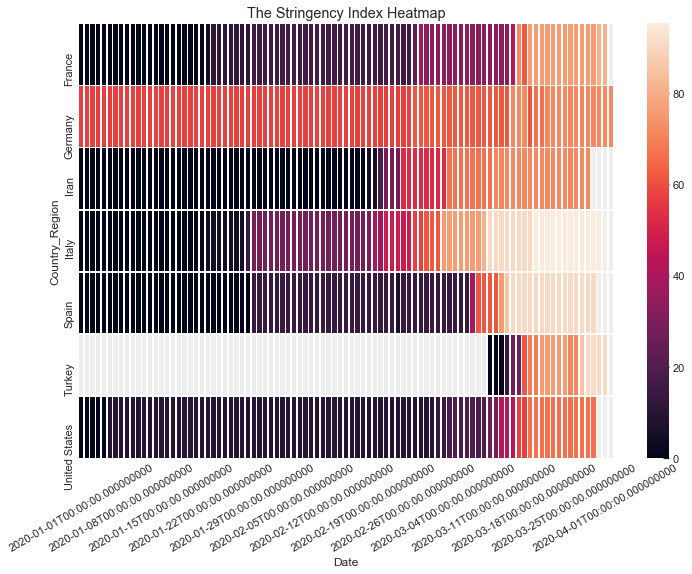

In [15]:
import matplotlib.dates as mdate

fig, ax = plt.subplots(figsize=(12, 8))

countries = ['Turkey', 'Spain', 'Italy', 'Iran', 'France', 'Germany', 'United States']
countries_si = stringency_index.loc[stringency_index['Country_Region'].isin(countries)]
display(countries_si.head())
ax = sns.heatmap(countries_si.pivot('Country_Region', 'Date', 'SI'), linewidths=0.5, xticklabels=7)
plt.xticks(rotation=30)
plt.title('The Stringency Index Heatmap')
plt.show()

Dünya çapında kümülatif vaka sayısına ulaşmak için Onaylanmış vakaları ve ölüm sütunlarını Tarihe göre gruplama işleviyle grupladık. Fark fonksiyonu ile farkı kümülatif tabloya alarak zamana göre günlük istatistikler elde ettiğimiz tabloyu oluşturduk.

In [16]:
cumulative_df = df.groupby('Date', as_index=False)['Confirmed','Deaths', 'Recovered'].sum().sort_values(by='Date')

daily_df = cumulative_df.copy(deep=True)
daily_df[daily_df.columns.difference(['Date'])] = daily_df[daily_df.columns.difference(['Date'])].diff(axis=0).fillna(0)
daily_df[daily_df.select_dtypes(['float64']).columns] = daily_df.select_dtypes(['float64']).apply(lambda x: x.astype('int64'))

display(cumulative_df.tail())
display(daily_df.tail())

,Date,Confirmed,Deaths,Recovered
111,2020-05-12,4261741,291942,1459275
112,2020-05-13,4347012,297197,1513280
113,2020-05-14,4442157,302418,1551698
114,2020-05-15,4542341,307666,1600051
115,2020-05-16,4634062,311781,1655256


,Date,Confirmed,Deaths,Recovered
111,2020-05-12,84245,5612,36157
112,2020-05-13,85271,5255,54005
113,2020-05-14,95145,5221,38418
114,2020-05-15,100184,5248,48353
115,2020-05-16,91721,4115,55205


### Dünya çapında ölüm ve iyileşme oranı analizi

Salgının ciddiyetini gözlemleyebilmek için ölümcüllük oranının diğer korona tiplerine oranla ne seviyede olduğunu inceleyeceğiz. İyileşme oranının ise yeni tedavi yöntemleri ile artmaktadır.


In [17]:
rate_df = cumulative_df.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

rate_df["Mortality Rate"] = (rate_df["Deaths"]/rate_df["Confirmed"])*100
rate_df["Recovery Rate"]  = (rate_df["Recovered"]/rate_df["Confirmed"])*100

print("Ortalama Ölüm Oranı", rate_df["Mortality Rate"].mean())
print("Ortalama İyileşme Oranı", rate_df["Recovery Rate"].mean())

Ortalama Ölüm Oranı 4.630609179446139
Ortalama İyileşme Oranı 26.28610785573438


**Ölüm oranı**

SARS 9.63%, MERS 34.45%, COVID-19 4.63% (artıyor)

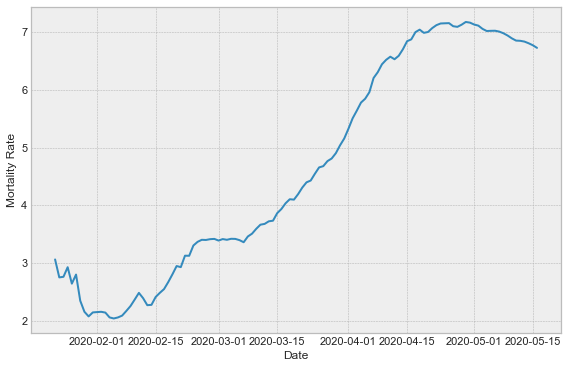

In [18]:
ax = sns.lineplot(x=rate_df.index, y="Mortality Rate", data=rate_df)

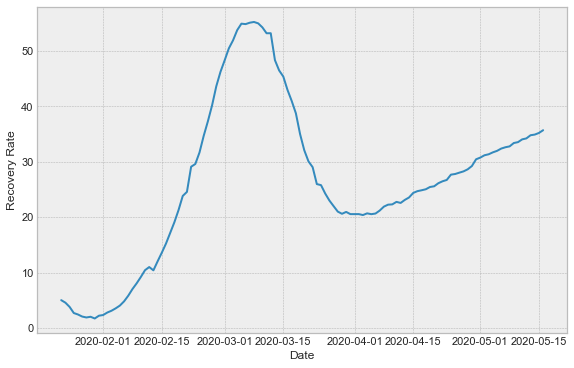

In [19]:
ax = sns.lineplot(x=rate_df.index, y="Recovery Rate", data=rate_df)

Günde rapor edilen vaka sayısı dik bir artış göstermiyor. Ancak salgının hala hızla yayılmaya devam ettiğini söyleyebiliriz. Toplam vaka sayısı 4 milyonu ve toplam ölüm sayısı 300 bini aştı.

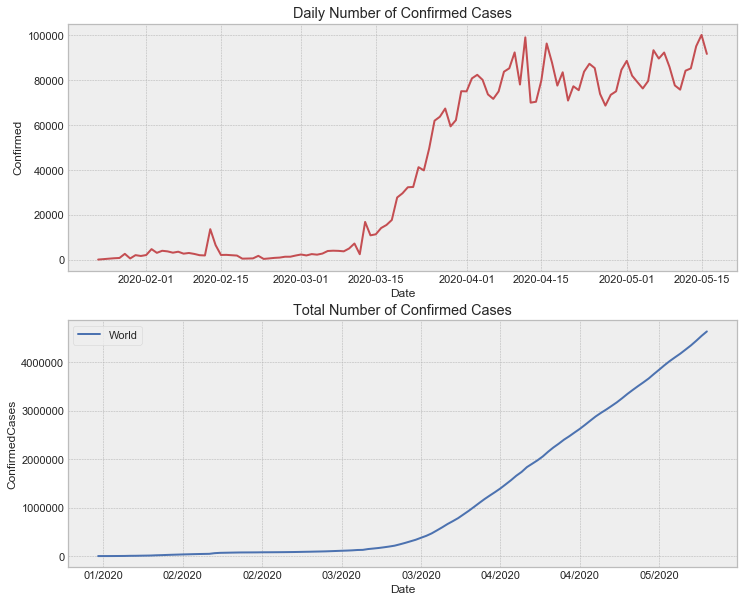

<Figure size 684x432 with 0 Axes>

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.plot(cumulative_df.loc[1:, 'Date'], daily_df.loc[1:, 'Confirmed'], label="World", color="r")
ax1.set(xlabel="Date",
       ylabel="Confirmed",
       title="Daily Number of Confirmed Cases")

ax2.plot(cumulative_df['Date'].values, cumulative_df['Confirmed'], label="World", color="b")
ax2.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="Total Number of Confirmed Cases")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.legend()
plt.show()
plt.gcf().autofmt_xdate()

Günlük verilere baktığımızda ölüm vakaları azalmaya başladı. Bu, salgına karşı mücadelenin daha iyi hale geldiğini göstermektedir. Uygulanan yeni tedavi yöntemleri başarılı görünmektedir.

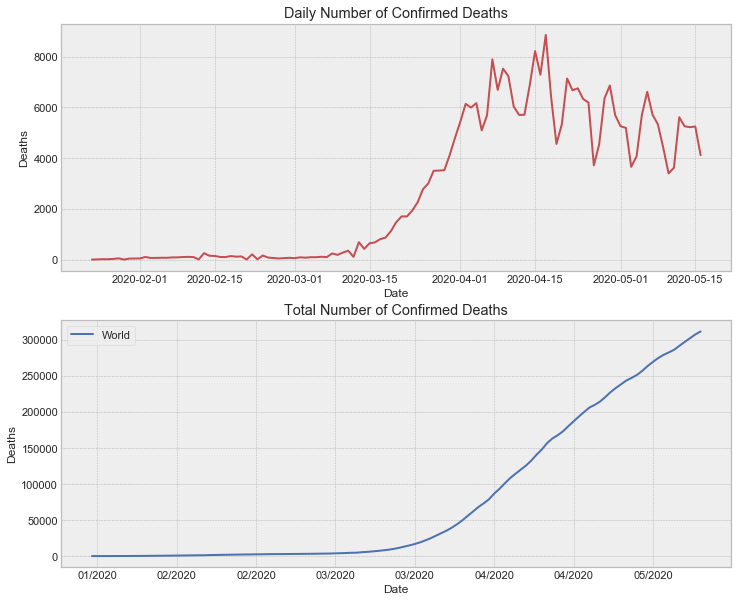

<Figure size 684x432 with 0 Axes>

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.plot(cumulative_df.loc[1:, 'Date'], daily_df.loc[1:, 'Deaths'], label="World", color="r")
ax1.set(xlabel="Date",
       ylabel="Deaths",
       title="Daily Number of Confirmed Deaths")

ax2.plot(cumulative_df['Date'].values, cumulative_df['Deaths'], label="World", color="b")
ax2.set(xlabel="Date",
       ylabel="Deaths",
       title="Total Number of Confirmed Deaths")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.legend()
plt.show()
plt.gcf().autofmt_xdate()

İleride kullanmak üzere aşağıdaki gibi bir fonksiyon yazdık. Bu işlev, istenen ülke adına göre günlük veya kümülatif istatistikleri döndürür. Günlük olup olmadığına "günlük" parametresi ile karar veriyoruz.

In [22]:
def get_df_by_country(df_country, country, daily=True):
    tmp = df_country.loc[:, ['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']].loc[(df_country['Country/Region'] == country)]
    tmp.index = np.arange(0, len(tmp))
    if daily:
        tmp[tmp.columns.difference(['Date', 'Country/Region'])] = tmp[tmp.columns.difference(['Date', 'Country/Region'])].diff(axis=0).fillna(0)
        tmp[tmp.select_dtypes(['float64']).columns] = tmp.select_dtypes(['float64']).apply(lambda x: x.astype('int64'))
        return tmp 
    else:
        return tmp

Toplam doğrulanmış vakalar: diğer ülkelere göre ne kadar hızlı arttılar?

Şu anda en fazla sayıda vakanın bulunduğu ülkeleri Ülke / Bölge sütununa göre gruplandırdık. ABD ve Rusya'da olumlu vakaların sayısının diğer ülkelere göre hızla arttığını gözlemliyoruz. Rusya'nın vaka sayısına göre tedavide başarılı olduğunu söyleyebiliriz. Öte yandan, İtalya'nın tedavi başarısızlıklarında çok sayıda ölüm bildirdiğini görüyoruz.

In [23]:
top10_countries = df[df['Date'] == df['Date'].max()]
top10_countries = top10_countries.groupby('Country/Region', as_index=False)['Confirmed','Deaths'].sum()
top10_countries = top10_countries.nlargest(10, 'Confirmed')
top10_countries

,Country/Region,Confirmed,Deaths
174,US,1467820,88754
139,Russia,272043,2537
178,United Kingdom,241461,34546
23,Brazil,233511,15662
158,Spain,230698,27563
85,Italy,224760,31763
62,France,179630,27532
66,Germany,175752,7938
173,Turkey,148067,4096
81,Iran,118392,6937


Aşağıdaki grafikte, ABD'nin pandeminin başlangıcındaki gevşek politikasından dolayı teyit edilen vaka sayısının ne kadar yüksek olduğunu görüyoruz.

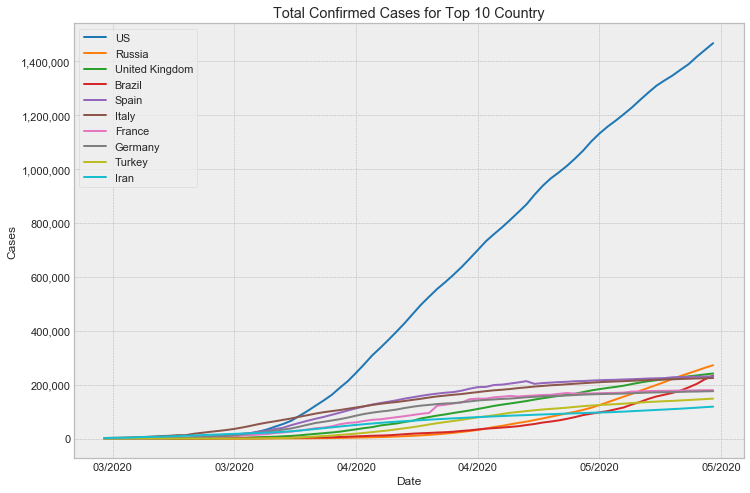

<Figure size 684x432 with 0 Axes>

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

for i, country_name in enumerate(top10_countries['Country/Region'].values):
    
    tmp_df = get_df_by_country(df, country_name, daily=False)
    ylabels = [format(label, ',.0f') for label in ax.get_yticks()]
    ax.set_yticklabels(ylabels)
    ax.plot(tmp_df['Date'].iloc[40:].values, tmp_df.iloc[40:]['Confirmed'], label=country_name, color=colors[i])

ax.set(xlabel="Date",
       ylabel="Cases",
       title="Total Confirmed Cases for Top 10 Country")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.legend()
plt.show()
plt.gcf().autofmt_xdate()

# Modelleme Ve Değerlendirme
Projemize 3 farklı model uyguladık. Sırasıyla SIR, ARIMA ve SARIMAX modellerini açıklayacağız.


# SIR Model

SIR modeli, enfekte hastalıkların matematiksel modellemesi için kullanılan basit ve diğer birçok türev modelin temelidir. Harflerin adındaki sırası aslında her bir vakanın akış düzenini gösterir. 

<img src="https://www.lewuathe.com/assets/img/posts/2020-03-11-covid-19-dynamics-with-sir-model/sir.png" width="600" height="180" />

Model, bir hastalığın nasıl yayıldığı veya enfekte edilen toplam sayı veya bir salgının süresi gibi şeyleri tahmin etmeye çalışır. **Şüpheli (sağlıklı) popülasyon**, **I Enfekte popülasyon**, **R** hastalıktan kurtulmuş popülasyon. Bu değişkenler (S, I ve R) her bir bölmedeki belirli bir zamanda insan sayısını temsil eder.

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/29728a7d4bebe8197dca7d873d81b9dce954522e" width="150" height="150" />

Duyarlı, enfekte ve iyileşmiş bireylerin sayısının zaman içinde değişebileceğini göstermek için (toplam popülasyon büyüklüğü sabit kalsa bile), kesin sayıları t (zaman) fonksiyonu haline getiririz: **S(t)**, **I(t)** ve **R(t)**. R0, üreme numarası:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4aae42f8253a395c52a798a9ad5a7e4adb6fceea" width="60" height="50" /> 

burada **ß** kontaminasyon olasılığı, **gama** iyileşme olasılığıdır.



In [25]:
from scipy.integrate import odeint
from scipy import integrate, optimize
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

Aşağıdaki modeli uyguladık ve başlangıç parametrelerini verdik. Odeint işlevi diferansiyel denklemleri çözmemize yardımcı olacaktır, bu yüzden odeint'e gönderdik. Başlangıçta, nüfusun yüzde 99'unu sağlıklı ve enfekte olanın yüzde 1'ini belirledik. Bu üç değerin grafikte zaman içinde nasıl değiştiğini görürsünüz. Sağlıklı insan sayısı zamanla azalacağından, türevinde olumsuz bir işaret vardır. Aksine, enfekte insan sayısı artacağından türevi pozitiftir.

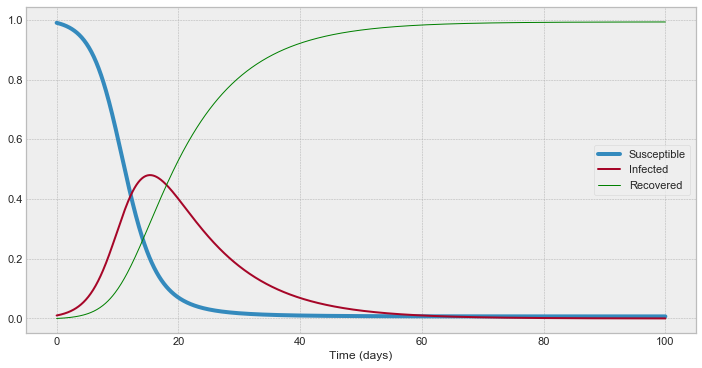

In [26]:
def SIR_model_test(y, t, N, beta, gamma):
    S, I, R = y
    dSt = (-beta * S * I / N)
    dIt = (beta * S * I / N) - (gamma * I)
    dRt = gamma * I
    return dSt, dIt, dRt

N = 1
beta = 0.5
gamma = 0.1
S0, I0, R0 = (0.99, 0.01, 0.0)

t = np.linspace(0, 100, 1000)
y0 = S0, I0, R0 # Initial conditions vector

result = odeint(SIR_model_test,[S0, I0, R0], t, args=(N, beta,gamma))
S, I, R = result.T

f, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(t, S, linewidth=4, label='Susceptible')
ax.plot(t, I, linewidth=2, label='Infected')
ax.plot(t, R, linewidth=1, label='Recovered', color='green')
ax.set_xlabel('Time (days)')
ax.legend()
plt.show();

Toplulukların hareketlilik oranını artırarak virüs bulaşmış insan sayısının zaman içinde nasıl değiştiğine bakalım. Hareketlilik oranındaki artış da enfeksiyon olasılığını artıracağından, salgın daha hızlı yayılmaktadır. Herkesin hareket edebileceği bir ortamda salgının neredeyse 1 ayda zirveye ulaştığını gözlemliyoruz (hareketlilik = 1).

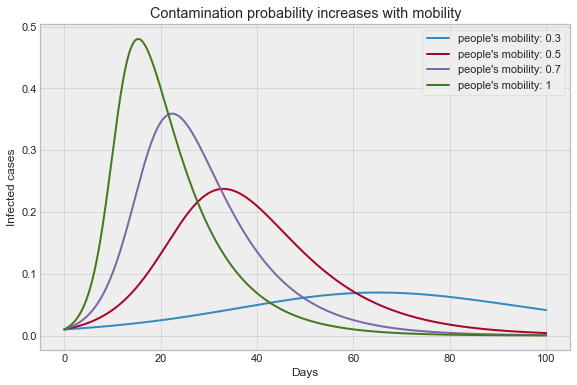

In [27]:
m = [0.3, 0.5, 0.7, 1]
results = list()
for i in m:
    result = odeint(SIR_model_test,[S0, I0, R0], t, args=(N, beta*i, gamma))
    S, I, R = result.T
    results.append(I)

for i in range(len(m)):
    plt.plot(t, results[i], label = "people's mobility: " + str(m[i]))

plt.title("Contamination probability increases with mobility")
plt.xlabel("Days")
plt.ylabel("Infected cases")
plt.legend()
plt.show()

Türkiye için modelimizi oluşturalım. Türkiye'nin nüfusu olan modelde N parametresinin değerini belirledik. S, I ve R değerleri için tablo işlemlerini tamamladıktan sonra orijinal tabloya entegre ettik. Örneğin, "I" sütunu Türkiye'deki aktif enfekte kişilerin sayısını göstermektedir.

In [28]:
country_name = 'Turkey'
turkey_df = get_df_by_country(df, country_name, daily=False)


# using LabelEncoder to transform Date column
turkey_df['DayNo'] = preprocessing.LabelEncoder().fit_transform(turkey_df.Date)

turkey_population = useful_features[useful_features['Country_Region'] == country_name].Population_Size.values[0]
turkey_df['R'] = turkey_df['Deaths'] + turkey_df['Recovered']
turkey_df['I'] = turkey_df['Confirmed'] - turkey_df['R']
turkey_df['S'] = turkey_population-turkey_df['Confirmed'] - turkey_df['I'] - turkey_df['R']

In [29]:
turkey_df.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,DayNo,R,I,S
111,2020-05-12,Turkey,141475,3894,98889,111,102783,38692,82036774
112,2020-05-13,Turkey,143114,3952,101715,112,105667,37447,82033496
113,2020-05-14,Turkey,144749,4007,104030,113,108037,36712,82030226
114,2020-05-15,Turkey,146457,4055,106133,114,110188,36269,82026810
115,2020-05-16,Turkey,148067,4096,108137,115,112233,35834,82023590


In [30]:
def SIR_model_turkey(y, t, beta, gamma):
    S, I, R = y
    N = turkey_population
    dSt = (-beta * S * I / N)
    dIt = (beta * S * I / N) - (gamma * I)
    dRt = gamma * I
    return dSt, dIt, dRt

def fit_ode(x, beta, gamma):
    return integrate.odeint(SIR_model_turkey, (S0, I0, R0), x, args=(beta, gamma))[:,1]

Her şeyden önce, modelin **25 Haziran** tarihine kadar tahmin edilmesi için gerekli parametreler verildi. Modele başlangıç değerlerimizle uyuyoruz ve en uygun Beta ve Gama parametrelerini elde ettik. Modelin çıktısına göre, salgının Haziran ortasında sona ereceği tahmin edilebilir. Son günlerde pandeminin azalması eğilimindeki yavaşlama nedeniyle, tahmini değerler ile gerçek değerler arasındaki fark artmıştır.

Beta= 3.031637897002001 , Gamma= 2.895188240568897
RMSE: 4405.034067006402


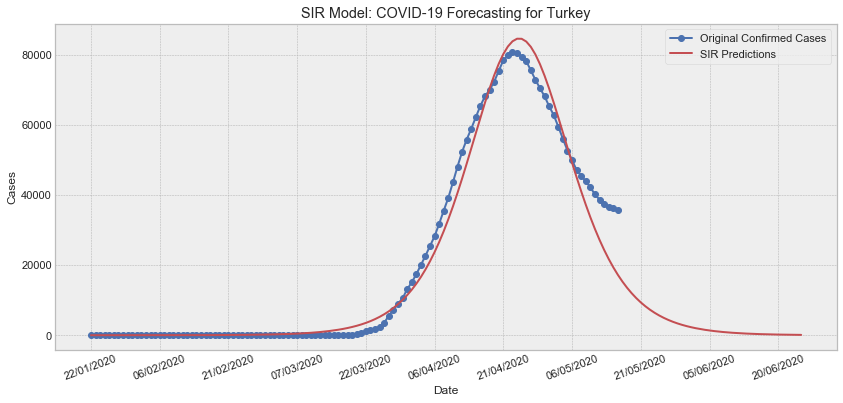

<Figure size 684x432 with 0 Axes>

In [31]:
N, I0 = turkey_population, 1
S0, R0 = turkey_population-I0, 0

x_values = turkey_df.DayNo
x_values = np.array(x_values, dtype=float)

y_values = np.array(turkey_df['I'], dtype=float)
y_values = np.array(y_values, dtype=float)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Use non-linear least squares to fit a function, f, to data.
popt, pcov = optimize.curve_fit(fit_ode, x_values, y_values)
beta = popt[0]
gamma = popt[1]
print("Beta=", beta, ", Gamma=", gamma)

time = np.arange(0, 156, 1)
fitted = integrate.odeint(SIR_model_turkey, (S0, I0, R0), time, args=(beta, gamma))[:,1]

errors = list()
error = sqrt(mean_squared_error(y_values, fitted[:len(y_values)]))
errors.append(('SIR', error))
print("RMSE:", error)

x_dates = pd.date_range(start='2020-01-22', end='2020-05-16')
dates = pd.date_range(start='2020-01-22', end='2020-06-25')
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(x_dates, y_values, label='Original Confirmed Cases', color='b', marker='o')
ax.plot(dates, fitted, label='SIR Predictions', color='r')

ax.set(xlabel="Date",
       ylabel="Cases",
       title="SIR Model: COVID-19 Forecasting for Turkey")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.xticks(rotation=20)
plt.legend()
plt.show()
plt.gcf().autofmt_xdate()

Tüm bunları herhangi bir ülke için yapmayı bir işlev haline getirelim.

In [32]:
def SIR_model_by_country(_df, country_name):

    def SIR_model(y, t, beta, gamma):
        S, I, R = y
        N = country_population
        dSt = (-beta * S * I / N)
        dIt = (beta * S * I / N) - (gamma * I)
        dRt = gamma * I
        return dSt, dIt, dRt

    def fit_ode(x, beta, gamma):
        return integrate.odeint(SIR_model, (S0, I0, R0), x, args=(beta, gamma))[:,1]

    sir_df = get_df_by_country(_df, country_name, daily=False)

    # using LabelEncoder to transform Date column
    sir_df['DayNo'] = preprocessing.LabelEncoder().fit_transform(sir_df.Date)

    country_population = useful_features[useful_features['Country_Region'] == country_name].Population_Size.values[0]
    sir_df['R'] = sir_df['Deaths'] + sir_df['Recovered']
    sir_df['I'] = sir_df['Confirmed'] - sir_df['R']
    sir_df['S'] = country_population-sir_df['Confirmed'] - sir_df['I'] - sir_df['R']

    N, I0 = country_population, 1
    S0, R0 = country_population-I0, 0

    x_values = sir_df.DayNo
    x_values = np.array(x_values, dtype=float)

    y_values = np.array(sir_df['I'], dtype=float)
    y_values = np.array(y_values, dtype=float)

    popt, pcov = optimize.curve_fit(fit_ode, x_values, y_values)
    beta = popt[0]
    gamma = popt[1]
    print("Beta=", beta, ", Gamma=", gamma)
    time = np.arange(0, 156, 1)
    x_dates = pd.date_range(start='2020-01-22', end='2020-05-16')
    dates = pd.date_range(start='2020-01-22', end='2020-06-25')

    fitted = integrate.odeint(SIR_model, (S0, I0, R0), time, args=(beta, gamma))[:,1]
    print("RMSE:", sqrt(mean_squared_error(y_values, fitted[:len(y_values)])))

    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(x_dates, y_values, label='Original Confirmed Cases', color='b', marker='o')
    ax.plot(dates, fitted, label='SIR Predictions', color='r')

    ax.set(xlabel="Date",
        ylabel="Cases",
        title="SIR Model: COVID-19 Forecasting for " + country_name)

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
    plt.xticks(rotation=20)
    plt.legend()
    plt.show()
    plt.gcf().autofmt_xdate()

İtalya'nın salgında yavaşlama aşamasına girdiğini gözlemliyoruz.

Beta= 2.1485775332758177 , Gamma= 2.003104498171207
RMSE: 27612.86362565678


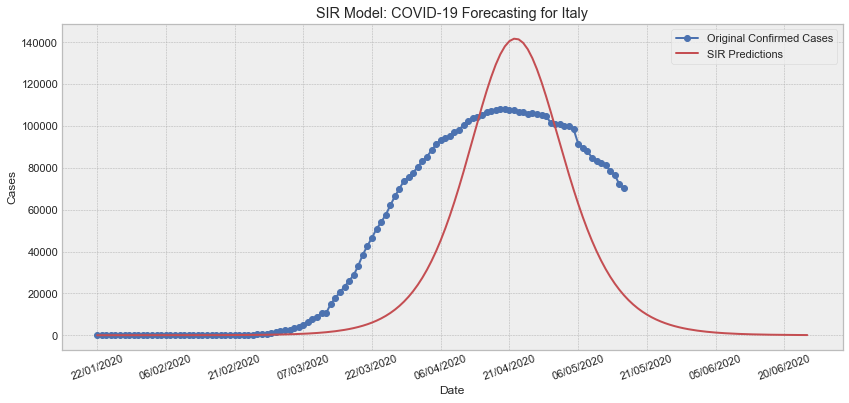

<Figure size 684x432 with 0 Axes>

In [33]:
SIR_model_by_country(df, 'Italy')

İspanya da aynı şekilde durumlar iyileşiyor gibi görünüyor.

Beta= 2.0786972129358974 , Gamma= 1.9311973499149362
RMSE: 20275.86159191783


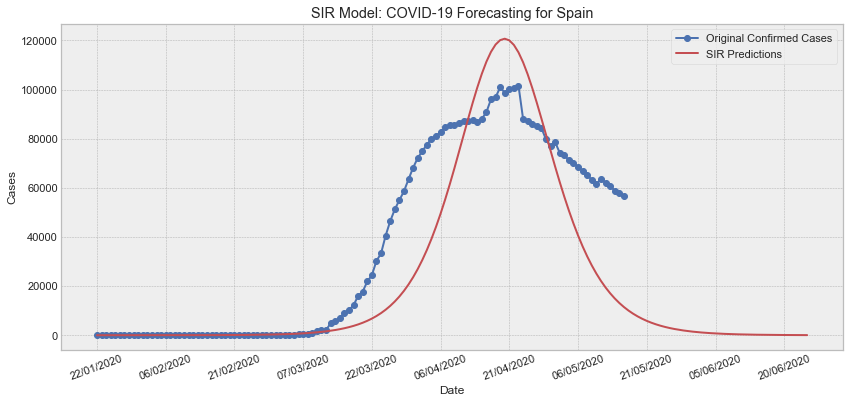

<Figure size 684x432 with 0 Axes>

In [34]:
SIR_model_by_country(df, 'Spain')

İran'ın ikinci bir dalga ile yüzleşmesi mümkün görünüyor. Model bu dalgayı tahmin edemedi ve başarılı bir uyum sağlayamadı.

Beta= 5.333171937011687 , Gamma= 5.179464532886666
RMSE: 5986.613169161839


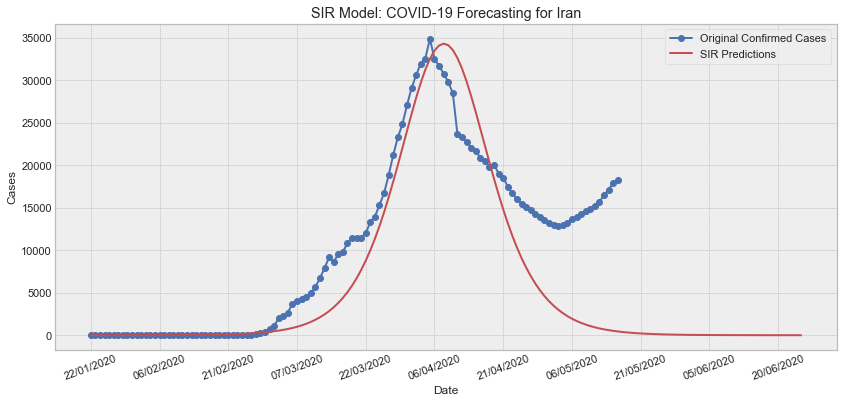

<Figure size 684x432 with 0 Axes>

In [35]:
SIR_model_by_country(df, 'Iran')

# ARIMA & SARIMAX

### ARIMA

<img src="images/arima.png">

Zaman serisi verilerimizi **ARIMA** (otoregresif entegrasyon hareketli ortalaması) kullanarak modelleyeceğiz ve gelecek hakkında tahminler yapacağız. Genel kullanımı ARIMA'dır (p, d, q). p parça için otoregresif ar (p) kullanılır ve d veri serisinin kaç kez azaltılacağını gösterir. Başka bir deyişle, her bir veri önceki verilerden kaldırılarak elde edilen yeni seri anlamına gelir. d genellikle verilerdeki eğilimi ortadan kaldırmak ve durağanlığa ulaşmak için kullanılır. q ise geçerli değeri kaç tane önceki gürültünün (hata) etkilediği olarak yorumlayabilirsiniz.

### SARIMAX

SARIMAX, ARIMA yönteminden birkaç farklılık içerir. Burada gördüğümüz yeni şey bu "S" dir, S mevsimsellik anlamına gelir, mevsimsel bilgileri dikkate alır. Mevsimsellik verilerle düzenli aralıklarla tekrarlanan bir modeldir.

# Türkiye için zaman serisi verilerinin ayrıştırılması

Herhangi bir zaman serisi aşağıdaki bileşenlere ayrılabilir:
Temel Düzey + Trend + Mevsimsellik + Hata

Zaman serilerinde artan veya azalan bir eğim olduğunda bir eğilim gözlemlenir. Mevsimsellik, birbirinden farklı olan ve düzenli zaman aralıklarında tekrarlanan desenler şeklinde gözlenir.

Grafik, Türkiye'deki günlük davaların zaman serisini ifade etmektedir. Eğilim ve mevsimsellik olan bu zaman serisi verilerinden temel bileşenleri gözlemlemek için statsmodels kütüphanesinin ayrıştırma yöntemini kullandık.

In [36]:
df_turkey_daily = get_df_by_country(df, 'Turkey', daily=True)
df_turkey_cumulative = get_df_by_country(df, 'Turkey', daily=False)

display(df_turkey_daily.tail())
display(df_turkey_cumulative.tail())

,Date,Country/Region,Confirmed,Deaths,Recovered
111,2020-05-12,Turkey,1704,53,3109
112,2020-05-13,Turkey,1639,58,2826
113,2020-05-14,Turkey,1635,55,2315
114,2020-05-15,Turkey,1708,48,2103
115,2020-05-16,Turkey,1610,41,2004


,Date,Country/Region,Confirmed,Deaths,Recovered
111,2020-05-12,Turkey,141475,3894,98889
112,2020-05-13,Turkey,143114,3952,101715
113,2020-05-14,Turkey,144749,4007,104030
114,2020-05-15,Turkey,146457,4055,106133
115,2020-05-16,Turkey,148067,4096,108137


Görünüşe göre bir artış ve sonra azalan bir eğilim. Alt alanda görüldüğü gibi, Artık bölüm orijinal veriler üzerinde ortadan kaldırılan eğilimi ve mevsimsel etkisini gösterir. Pandemi yayılımı 75 ila 100 gün arasında zirve yaptı.

(116, 5)

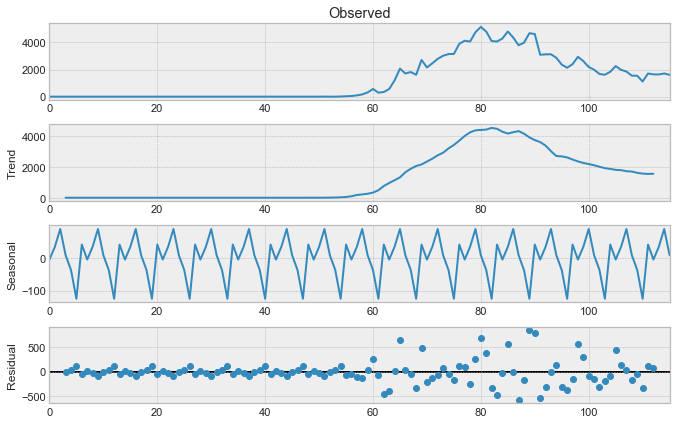

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
display(df_turkey_daily.shape)
fig=sm.tsa.seasonal_decompose(df_turkey_daily.Confirmed.values, model='additive', freq=7).plot()

## ARIMA ve SARIMAX Modellerini Oluşturma

Bir model oluşturmadan önce, zaman serisinin sabit olduğundan emin olmalıyız. Her şeyden önce, aşağıdaki örnekle bir zaman serisi verisinin durağan olmasının ne anlama geldiğini açıklayalım.

![stationary](http://www.seanabu.com/img/Mean_nonstationary.png)

Grafikte gösterilen değer, zaman serisi verilerinin ortalamasıdır. Sağda olduğu gibi, bu değer **zamanla** artarsa, verilerimiz sabit değildir. Başka bir deyişle, verilerimiz **zamanın bir fonksiyonu** olarak ifade edilebilir. Bununla birlikte, soldaki grafikte bu değer **zamanla artmaz**, bu nedenle sabit görünür.


İstatistiksel bir model kullanırken, verilerin birbirinden bağımsız olduğunu varsayıyoruz. Ancak, bu durumda, her veri noktasının belirli bir zamana bağlı olduğunu biliyoruz. Böyle bir modeli kullanmak için istatistiksel özellikler zaman içinde sabit olmalıdır. Dolayısıyla veriler sabit olmalıdır.

Verilerin durağan olup olmadığına karar vermenin iki yöntemi vardır. Bunlardan biri ortalama ve std'yi çizmektir. verilerin zamana bağlı olarak Bu değerler zaman içinde sabit kalırsa sabit kalır. Bununla birlikte, görsel çıkarımlar yapmak her zaman doğru ve uygulanabilir değildir.

Diğer yöntem, Artırılmış Dickey-Fuller testinin, birim kök testi adı verilen bir istatistiksel test türüdür. Birim kök testinin ardındaki fikir, bir zaman serisinin bir eğilim tarafından ne kadar güçlü tanımlandığını belirlemesidir.

*   **Rolling Statistics:** İstatistiksel özellikleri çizin ve ardından görsel çıkarımlar yapın. Zaman serileri, zamanla sabit kalırlarsa durağandır.
*   **Augmented Dickey-Fuller Test:** Bir veriyi durağan olarak çağırmak için, test istatistik değeri kritik değerlerden küçük ya da daha yakın olmalı ve p değeri 0.05'ten küçük olmalıdır.

In [38]:
from statsmodels.tsa.stattools import adfuller

def is_stationary(df_ts):
    # starting from the first day, we calculate the mean 
    # and standard deviation in a 7-day window width called rolling mean/std.
    rolling_mean = df_ts.rolling(window=7).mean()
    rolling_std = df_ts.rolling(window=7).std()
    
    # Rolling Statistics:
    plt.plot(df_ts, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
    # Augmented Dickey-Fuller Test:
    result = adfuller(df_ts)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

Orijinal veriler için testleri yukarıdaki fonksiyonda gerçekleştiriyoruz. İstatistiksel özelliklerin zamana göre arttığını görüyoruz. Ek olarak, ADF testinde, ADF İstatistiği değerinin kritik değerlerden ve p-değerinin 0.05'ten büyük olduğunu görüyoruz. Bu, verilerin sabit olmadığını gösterir.

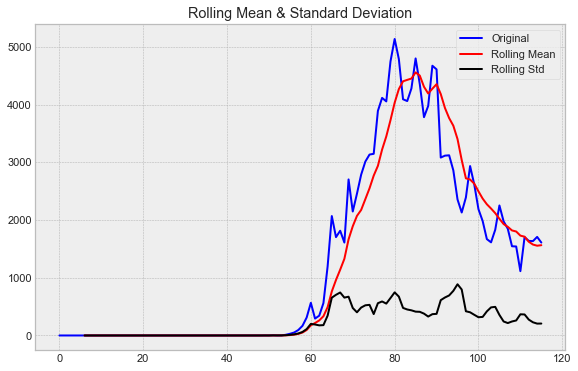

ADF Statistic: -1.9369547215587852
p-value: 0.31488103841793064
Critical Values:
	1%: -3.4936021509366793
	5%: -2.8892174239808703
	10%: -2.58153320754717


In [39]:
is_stationary(df_turkey_daily.Confirmed)

Modelimizi kullanmadan önce verileri durağan hale getirmeliyiz. Bunun için birkaç yöntem var. Bunlardan logaritmik dönüşümü kullanacağız. Verilerin logaritmasını aldıktan sonra, yuvarlanan ortalamaların logaritmasını da alıyoruz. Sonra bunu yuvarlanan kütükten çıkarırız. anlamına gelmek. Bu aşamalar verilerdeki eğilimi atmamızı sağlar.

In [40]:
turkey_daily_log = np.log(df_turkey_daily.loc[:, ['Confirmed']])
turkey_daily_log = turkey_daily_log.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

log_rolling_mean = turkey_daily_log.rolling(window=7).mean()
df_log_minus_mean = turkey_daily_log - log_rolling_mean
df_log_minus_mean = df_log_minus_mean.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

Aşağıda görüldüğü gibi, ADF testine göre, istatistiksel değerlerimiz sabit zaman serisi verileri biçimindedir. Test istatistik değeri kritik değerden düşük ve p değeri 0.05'ten düşüktür. Orijinal verilerden daha sabit veriler elde ettik.

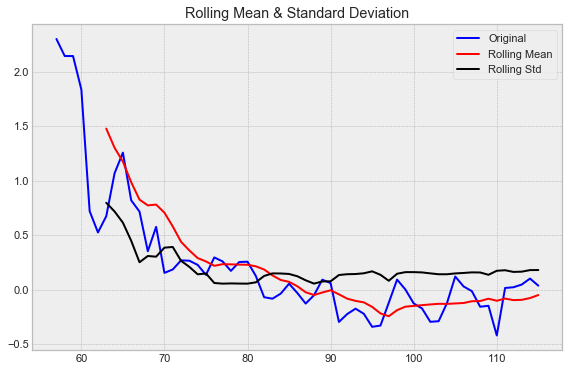

ADF Statistic: -4.486395579414546
p-value: 0.00020807482793851464
Critical Values:
	1%: -3.562878534649522
	5%: -2.918973284023669
	10%: -2.597393446745562


In [41]:
is_stationary(df_log_minus_mean.Confirmed)

Verileri bir kez kaydırır ve farkı tekrar elde ederiz. Sonuç olarak, daha sabit hale gelir.

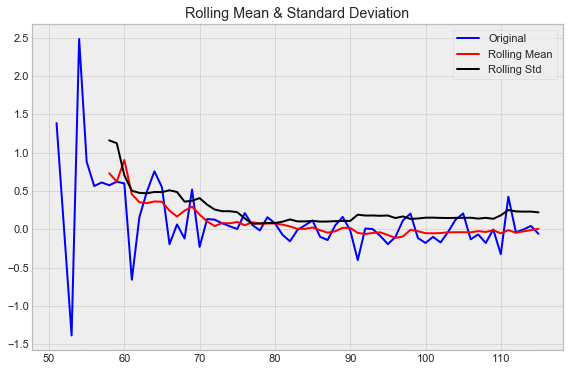

ADF Statistic: -4.506527299010488
p-value: 0.00019136812969822452
Critical Values:
	1%: -3.560242358792829
	5%: -2.9178502070837
	10%: -2.5967964150943397


In [42]:
turkey_daily_log_shift = turkey_daily_log - turkey_daily_log.shift()
turkey_daily_log_shift = turkey_daily_log_shift.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
is_stationary(turkey_daily_log_shift.Confirmed)

# ARIMA

Verileri sabit hale getirmek için d parametresini 1 olarak almak yeterli görünmektedir. Her değeri önceki 2 değerlerle tahmin edeceğimiz ve hatayı buna göre hesaplayacağımız için p ve q değerlerini 2 seçiyoruz.

In [43]:
date_idx = [116 + x for x in range(0,40)]
dates = pd.date_range(start='2020-01-22', end='2020-06-25')

def calculate_arima_by_country(_df, country_name, split_perc=0.85):
    param = (1,1,2)

    if country_name == 'Global':
        df_ts = daily_df
        param = (2,1,2)
    else:
        df_ts = get_df_by_country(_df, country_name, daily=True)

    country_train = df_ts[:int(len(df_ts)*split_perc)].loc[:, 'Confirmed'].values
    country_train = pd.DataFrame(data=country_train[:], index=dates[:int(len(df_ts)*split_perc)], columns=['Confirmed'])
    country_test = df_ts[int(len(df_ts)*split_perc):].loc[:, 'Confirmed'].values

    model = ARIMA(country_train, order=param)
    result = model.fit()
    fig, ax = plt.subplots(figsize=(14, 6))
    ax = country_train.loc['2020-03-01':].plot(ax=ax)
    fig = result.plot_predict(start=int(len(country_train)/1.01), end=int(len(country_train)* 1.5), 
                              ax=ax, plot_insample=False)
    predictions = result.forecast(steps=len(country_test))[0]
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=21))
    plt.legend()
    plt.xlabel("Dates")
    plt.ylabel("Cases")
    plt.title("ARIMA: COVID-19 Forecasting for " + country_name)
    plt.gcf().autofmt_xdate()
    plt.show()

    # root mean square error(RMSE), is a measure of
    # prediction accuracy of a forecasting method in statistics
    error = sqrt(mean_squared_error(country_test, predictions[:len(country_test)]))
    errors.append(('ARIMA', error))
    print("RMSE:", error)

    return predictions

Tahminlere göre, dünya çapındaki günlük vakaların sayısı uzun süre yüksek miktarlarda sabit kalacaktır.

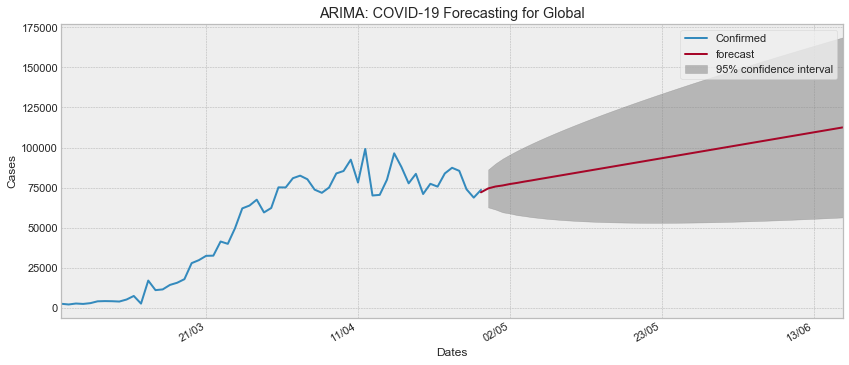

RMSE: 7443.500632560094


In [44]:
forecast_values = calculate_arima_by_country(df, 'Global', 0.85)

Türkiye'de salgının alt sınırı için yapılan tahminlere göre **Haziran** 'da bitmesi bekleniyor.

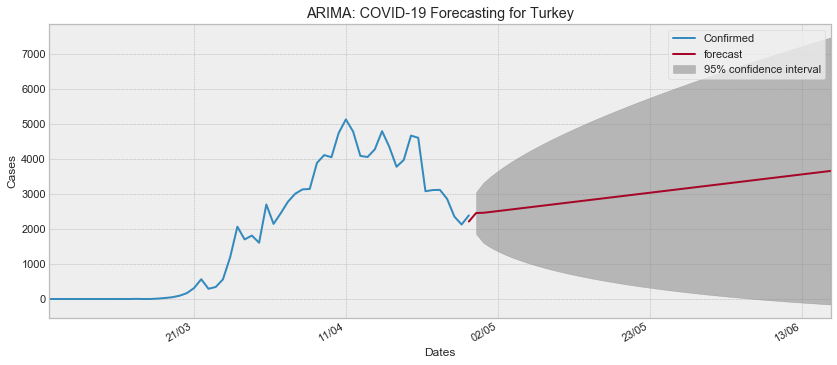

RMSE: 945.9480263351005


In [45]:
forecast_values = calculate_arima_by_country(df, 'Turkey', 0.85)

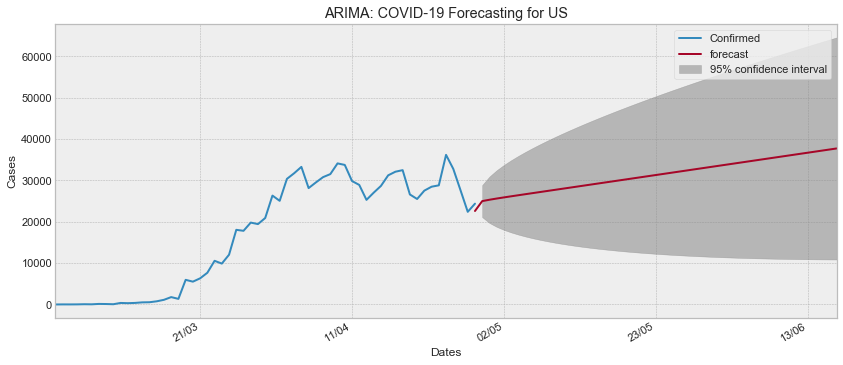

RMSE: 4981.610614433459


In [46]:
forecast_values = calculate_arima_by_country(df, 'US', 0.85)

# Sezonsal ARIMA (SARIMAX)

ARIMA modeli için yaptığımız aynı stabilizasyon süreçlerini uyguluyoruz.

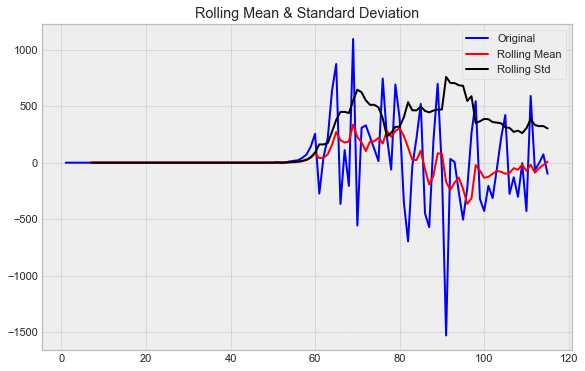

ADF Statistic: -3.4037840987671695
p-value: 0.01083054637492035
Critical Values:
	1%: -3.4912451337340342
	5%: -2.8881954545454547
	10%: -2.5809876033057852


In [47]:
df_turkey_daily['first_diff'] = df_turkey_daily.Confirmed - df_turkey_daily.Confirmed.shift(1)
is_stationary(df_turkey_daily.first_diff.dropna(inplace=False))

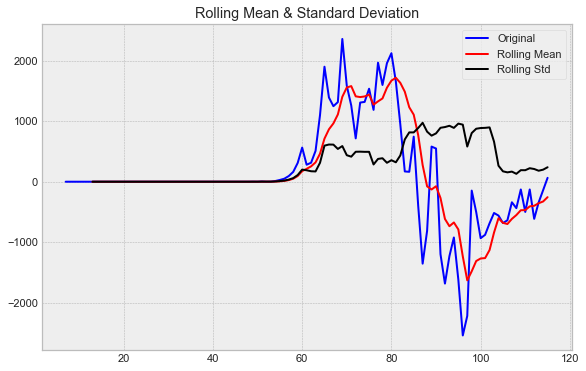

ADF Statistic: -3.4306215148455865
p-value: 0.009958239993839683
Critical Values:
	1%: -3.5011373281819504
	5%: -2.8924800524857854
	10%: -2.5832749307479226


In [48]:
df_turkey_daily['seasonal_diff'] = df_turkey_daily.Confirmed - df_turkey_daily.Confirmed.shift(7)
is_stationary(df_turkey_daily.seasonal_diff.dropna(inplace=False))

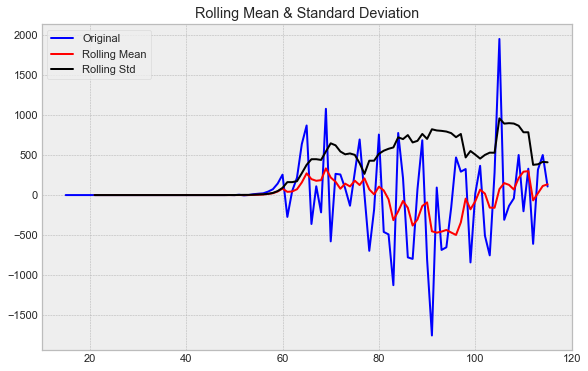

ADF Statistic: -2.901372955013547
p-value: 0.04518857427257318
Critical Values:
	1%: -3.5078527246648834
	5%: -2.895382030636155
	10%: -2.584823877658872


In [49]:
df_turkey_daily['seasonal_first_diff'] = df_turkey_daily.first_diff - df_turkey_daily.first_diff.shift(14)
is_stationary(df_turkey_daily.seasonal_first_diff.dropna(inplace=False))

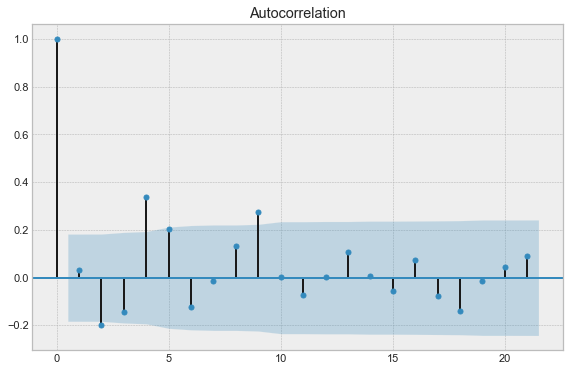

In [50]:
fig = sm.graphics.tsa.plot_acf(df_turkey_daily.Confirmed.diff().dropna())

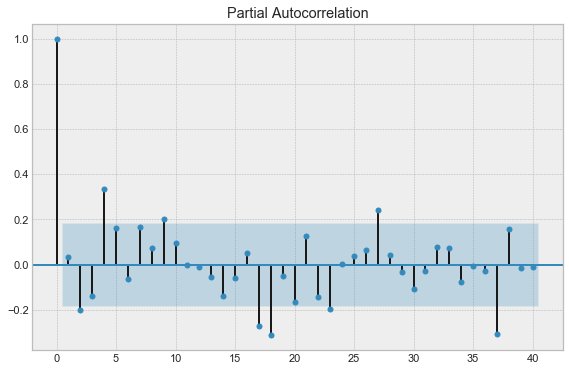

In [51]:
fig = sm.graphics.tsa.plot_pacf(df_turkey_daily.Confirmed.diff().dropna(), lags=40)

7 günlük verinin yuvarlama ortalamasını aldığımızdan ve hastalığın 2 haftaya kadar taşınma süresi olduğundan önceki 2 haftaya göre bir tahmin yapmayı seçtik.

In [52]:
cases_model = sm.tsa.statespace.SARIMAX(df_turkey_daily.Confirmed, trend='n', order=(14,0,7))
deaths_model = sm.tsa.statespace.SARIMAX(df_turkey_daily.Deaths, trend='n', order=(14,0,7))

cases_results = cases_model.fit()
deaths_results = deaths_model.fit()
print(cases_results.summary())

                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                  116
Model:              SARIMAX(14, 0, 7)   Log Likelihood                -810.790
Date:                Wed, 27 May 2020   AIC                           1665.580
Time:                        07:45:52   BIC                           1726.159
Sample:                             0   HQIC                          1690.172
                                - 116                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2728      1.730      0.158      0.875      -3.117       3.663
ar.L2         -0.0427      0.552     -0.077      0.938      -1.124       1.039
ar.L3         -0.2152      0.583     -0.369      0.7

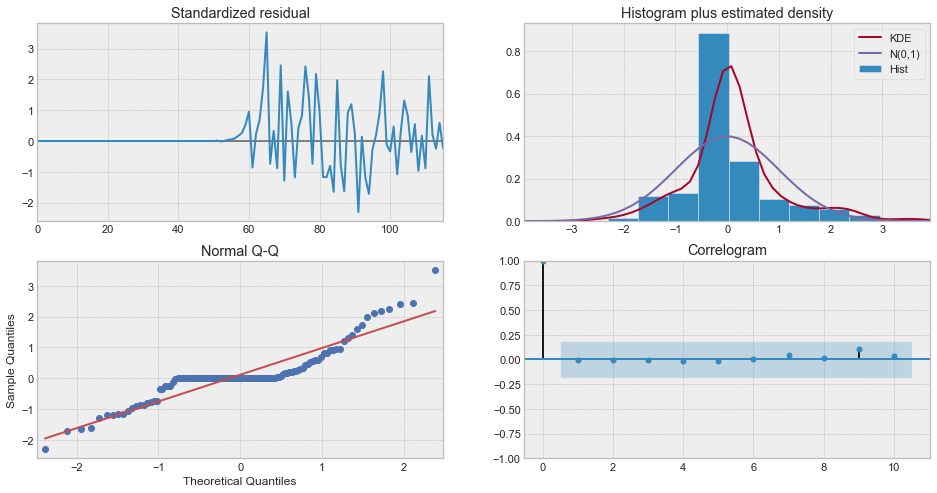

In [53]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

40 günlük bir tahmin yapmak istedik. Bunun için, verilerimize önümüzdeki 40 günün tarih çizgilerini ekledik.

In [54]:
future = pd.DataFrame(index=date_idx, columns=df_turkey_daily.columns)

df_turkey_concat = pd.concat([df_turkey_daily, future])
df_turkey_concat['Date'] = dates
df_turkey_concat = df_turkey_concat.loc[:, ['Date', 'Country/Region', 'Confirmed', 'Deaths']]

In [55]:
df_turkey_concat['forecast'] = cases_results.predict(start = 90, end = 155)

SARIMAX için seçtiğimiz parametrelere göre, salgının **29 Haziran** tarihinde bitmesi bekleniyor. Bu veriler ARIMA ile elde ettiğimiz Haziran değeri ile eşleşiyor. Hata oranı, ARIMA modelinin hata oranına yakındı.

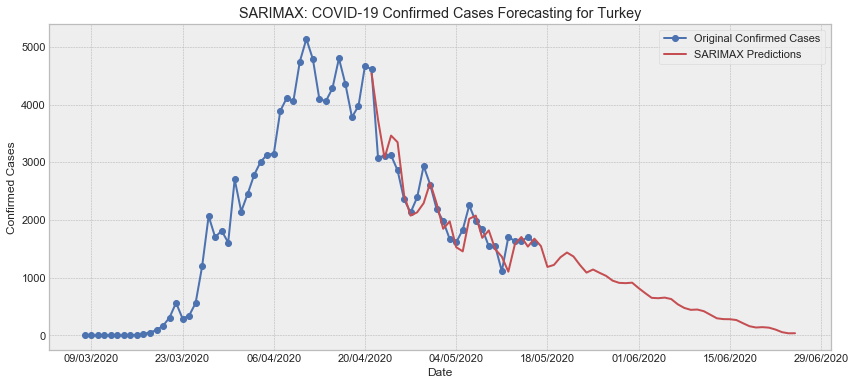

RMSE: 262.96542800676946


<Figure size 684x432 with 0 Axes>

In [56]:
fig, ax = plt.subplots(figsize=(14, 6))
df_turkey_concat = df_turkey_concat.iloc[-110:]

ax.plot(df_turkey_concat['Date'].values, df_turkey_concat['Confirmed'], label='Original Confirmed Cases', color='b', marker='o')
ax.plot(df_turkey_concat['Date'].values, df_turkey_concat['forecast'], label='SARIMAX Predictions', color='r')

ax.set(xlabel="Date",
       ylabel="Confirmed Cases",
       title="SARIMAX: COVID-19 Confirmed Cases Forecasting for Turkey")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14))
plt.legend()
plt.show()
plt.gcf().autofmt_xdate()

error = sqrt(mean_squared_error(df_turkey_concat.iloc[50:70].Confirmed, df_turkey_concat.iloc[50:70].forecast))
errors.append(('SARIMAX', error))
print("RMSE:", error)

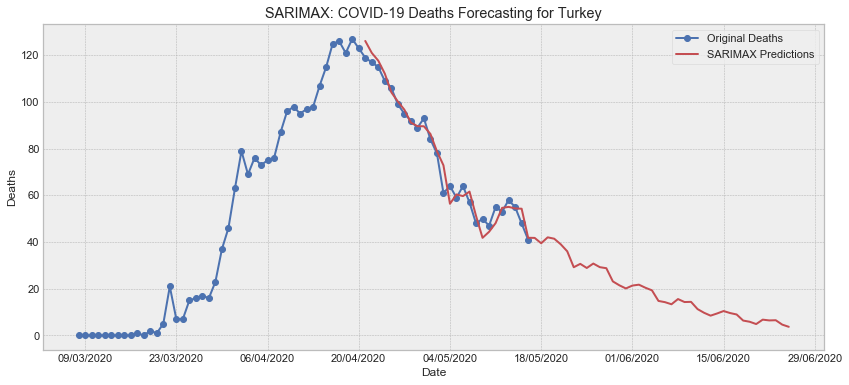

RMSE: 4.721714222686626


<Figure size 684x432 with 0 Axes>

In [57]:
df_turkey_concat['forecast'] = deaths_results.predict(start = 90, end = 155)

fig, ax = plt.subplots(figsize=(14, 6))
df_turkey_concat = df_turkey_concat.iloc[-110:]

ax.plot(df_turkey_concat['Date'].values, df_turkey_concat['Deaths'], label='Original Deaths', color='b', marker='o')
ax.plot(df_turkey_concat['Date'].values, df_turkey_concat['forecast'], label='SARIMAX Predictions', color='r')

ax.set(xlabel="Date",
       ylabel="Deaths",
       title="SARIMAX: COVID-19 Deaths Forecasting for Turkey")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14))
plt.legend()
plt.show()
plt.gcf().autofmt_xdate()

error = sqrt(mean_squared_error(df_turkey_concat.iloc[50:70].Deaths, df_turkey_concat.iloc[50:70].forecast))
errors.append(('SARIMAX', error))
print("RMSE:", error)

### RMSE (Root-mean Square Error)
Zaman serisi verilerindeki performansı ölçmek için her model için RMSE kullandık. RMSE, belirli bir veri kümesi için farklı modellerin tahmin hatalarını karşılaştırmak için bir doğruluk ölçüsüdür.

RMSE Formülü             |  RMSE Görselleştirme
:-------------------------:|:-------------------------:
<img src="images/rmse_f.png">  |  <img src="images/rmse_plot.png">

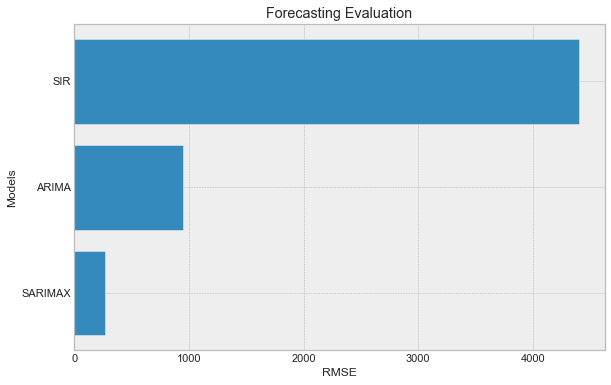

In [59]:
errors = [('SIR', 4405.029835823134),
 ('ARIMA', 945.8815028659368),
 ('SARIMAX', 262.9830764867462)]
fig, ax = plt.subplots()

models = ('SIR', 'ARIMA', 'SARIMAX')
y_pos = np.arange(len(models))

ax.barh(y_pos, [e[1] for e in errors], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis()
ax.set_xlabel('RMSE')
ax.set_ylabel('Models')
ax.set_title('Forecasting Evaluation')

plt.show()

# Sonuç

COVID-19 salgını ile ilgili elde ettiğimiz zaman serisi şeklinde toplanan verileri nasıl işleyeceğimize dair araştırmalar gerçekleştirdik. Folium ve plotly kütüphanelerinden faydalanarak veride yer alan lokasyon bilgilerini harita üzerinde görselleştirdik. Trend, sezonsallık gibi kavramları açıkladık. Epidemolojik bir model olan SIR modelini en yalın haliyle uyguladık. Bu modelle salgının parametrelerinin, salgın sürecine nasıl etki ettiğine dair grafikler sunduk. İnsanların izolasyon seviyesinin salgının tepe noktasını veya düz bir yönelim sergilemesini nasıl etkilediğini simüle ettik. Zaman serisi verilerde durağanlığın ne olduğunu, neden gerektiğini ve verimizi nasıl durağan hale getireceğimize dair adımlar yaptık. Ardından, istatistiksel modellerden ARIMA ve SARIMAX'ı en uygun parametlere fit ederek kullandık.

Autocorrelation             |  Partial Autocorrelation
:-------------------------:|:-------------------------:
<img src="images/auto.png">  |  <img src="images/pauto.png">

ARIMA modellerinin seçilen p, d ve q parametrelerine göre çok farklı tahminler yapabildiğini gözlemledik. Bu parametreleri nasıl seçeceğimize dair bazı grafiksel yöntemleri kullanabileceğimizi bulduk. Örneğin yukarıdaki grafikte p ve q değerlerine, mavi alan içerisinden ilk kez dışarı çıkan noktanın değeriyle karar verebiliriz. SARIMAX modelinde ise sezonsal kavramı öne çıkarmak için haftalık veya 2 haftalık parametreleri denedik. Hastalığın etkisini göstermesinde yaklaşık 1 haftalık sürenin geçerli olmasından dolayı bu parametreleri seçtik. Sezonsallık kavramının etkisi ile en başarılı tahmini SARIMAX modeli gerçekleştirdi. Bu modelin tahminine göre salgının Haziran sonunda bitmesi bekleniyor. Bu projeyi geliştirmek adına ileride SIR modelleri içerisinde yer alan daha kompleks modelleri implement etmek istiyoruz. Ayrıca Poly. Regresyon kullanarak birden fazla parametreye göre (ülkenin ortalama yaşı, sıklık indeksi, nüfusu, hastane kapasitesi) tahminler üretmek ve karşılaştırmalar yapmak istiyoruz. 

Sağlıcakla!

# Referanslar

Forecasting:

https://www.kaggle.com/eswarchandt/timeseries-forecasting-of-covid-19-arima

https://www.kaggle.com/neelkudu28/covid-19-visualizations-predictions-forecasting

https://www.kaggle.com/chrischow/demographic-factors-for-explaining-covid19

SIR:

http://erdos2.matkafasi.com/?p=1065

https://www.kaggle.com/khanalkiran/covid19-ca-sir-model

https://www.kaggle.com/carloslira/covid19-mexico-sir-map-with-geopandas

https://github.com/RemiTheWarrior/epidemic-simulator/blob/master/epidemic.py

https://www.kaggle.com/dgrechka/sir-model-fit-for-italy

https://www.kaggle.com/abhijithchandradas/sir-model-don-t-understand-calculus-don-t-worry

Building ARIMA and SARIMAX Model:

https://dataplatform.cloud.ibm.com/exchange/public/entry/view/815137c868b916821dec777bdc23013c

https://machinelearningmastery.com/time-series-data-stationary-python/